In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [6]:
base_dir = r"CATS_DOG"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'CATS_DOG\\train'

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

C:\Users\62857\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.5018 - loss: 0.9236

C:\Users\62857\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 666ms/step - accuracy: 0.5018 - loss: 0.9218 - val_accuracy: 0.5394 - val_loss: 0.6793
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 820ms/step - accuracy: 0.5434 - loss: 0.6910 - val_accuracy: 0.5238 - val_loss: 0.6864
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.5665 - loss: 0.6824

C:\Users\62857\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 549ms/step - accuracy: 0.5664 - loss: 0.6824 - val_accuracy: 0.5681 - val_loss: 0.6699
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 537ms/step - accuracy: 0.5594 - loss: 0.6770 - val_accuracy: 0.5975 - val_loss: 0.6510
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 538ms/step - accuracy: 0.5860 - loss: 0.6754 - val_accuracy: 0.6112 - val_loss: 0.6531
Epoch 6/10
 51/100 ━━━━━━━━━━━━━━━━━━━━ 19s 403ms/step - accuracy: 0.6311 - loss: 0.6510

C:\Users\62857\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 286ms/step - accuracy: 0.6278 - loss: 0.6527 - val_accuracy: 0.6025 - val_loss: 0.6570
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 582ms/step - accuracy: 0.5756 - loss: 0.6754 - val_accuracy: 0.5669 - val_loss: 0.6718
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 561ms/step - accuracy: 0.5893 - loss: 0.6704 - val_accuracy: 0.6019 - val_loss: 0.6612
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 566ms/step - accuracy: 0.5967 - loss: 0.6652 - val_accuracy: 0.6313 - val_loss: 0.6492
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 562ms/step - accuracy: 0.6067 - loss: 0.6583 - val_accuracy: 0.6794 - val_loss: 0.6112


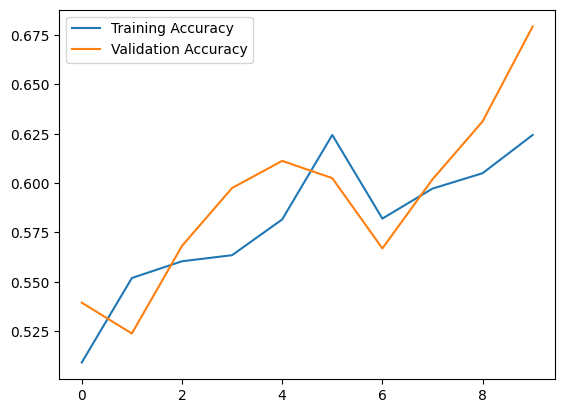

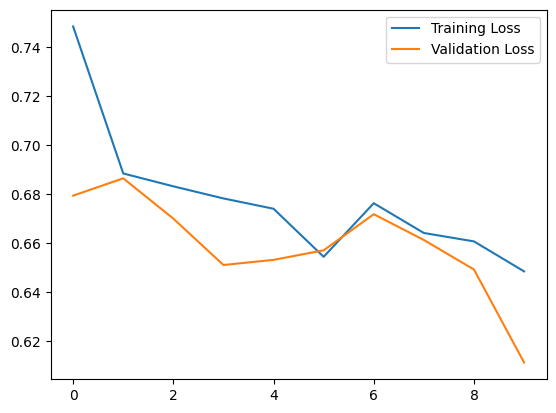

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r"C:\Users\62857\Pictures\opencv\ipyn\cnn\kucing1.jpg"  # Ganti dengan gambar uji
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
It's a Dog!


In [14]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze base model

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 32s 1us/step


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r"C:\Users\62857\Pictures\opencv\ipyn\cnn\kucing1.jpg"  # Ganti dengan gambar uji
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
It's a Cat!
